In [ ]:
# Welcome to a new geoprogramming video

In [ ]:
# This time we will have our first script with... Geopandas

In [ ]:
#Geopandas is one of the most used geospatial packages for python
#It is based on the popular pandas, a package that allow to work with dataframes (kind of tables)
# We are gonna create a choroplete map using geopandas 
# Let´s start !!!!!

In [ ]:
#The #this first step will be to load the package
#If you are using anaconda enviorment, this package may cause some problems, so I would suggest you to follow 
#this  tutorial with colab (from Google)
# still you can install the package on conda using this
#conda create -n geo-env -c conda-forge geopandas
# in our case, it is already installed soo, let´s load the package

In [1]:
import geopandas as gpd

In [ ]:
# remember that the alias (as gdp) is not compulsory but helps to have faster coding

In [2]:
 #to this example, we are gonna import a geojson file directly to gpd
# https://datahub.io/core/geo-admin1-us, this is the webpage from where  it is comming 
gdf = gpd.read_file("https://datahub.io/core/geo-admin1-us/r/admin1-us.geojson")

In [3]:
# let´s check what it contains with .head(number of rows to see)
gdf.head(5)

,name,country,ISO3166-1-Alpha-3,state_code,id,geometry
0,Minnesota,United States of America,USA,MN,USA-3514,POLYGON ((-89.59940914585667 48.01027395282483...
1,Montana,United States of America,USA,MT,USA-3515,POLYGON ((-111.1941892159301 44.56115631771988...
2,North Dakota,United States of America,USA,ND,USA-3516,"POLYGON ((-96.60135901567638 46.3513571233911,..."
3,Hawaii,United States of America,USA,HI,USA-3517,"(POLYGON ((-155.93665 19.05939, -155.90806 19...."
4,Idaho,United States of America,USA,ID,USA-3518,POLYGON ((-111.0497277494581 44.48816335710761...


In [5]:
# a pandas file would be the same but without the geometry attribute
# now, remember the sf video? the geometry is a wkt, in this case a poligon
gdf.geometry.head(5)

0    POLYGON ((-89.59940914585667 48.01027395282483...
1    POLYGON ((-111.1941892159301 44.56115631771988...
2    POLYGON ((-96.60135901567638 46.3513571233911,...
3    (POLYGON ((-155.93665 19.05939, -155.90806 19....
4    POLYGON ((-111.0497277494581 44.48816335710761...
Name: geometry, dtype: geometry

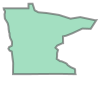

In [6]:
# so we can plot them individually
gdf.geometry[0]

In [7]:
# we can also check the boundaries of each geometry 
gdf.bounds.head(5)

,minx,miny,maxx,maxy
0,-97.228943,43.500187,-89.488885,49.389285
1,-116.048234,44.360083,-104.026616,49.005640
2,-104.092762,45.956601,-96.538908,49.005640
3,-159.800510,18.916190,-154.807410,22.236180
4,-117.194391,41.993122,-111.049728,49.000369


In [8]:
# and even find its centroid
gdf.centroid.head(5)

0    POINT (-94.17743611908642 46.36007316339725)
1    POINT (-109.6590042394482 47.04846199440962)
2    POINT (-100.4847003412699 47.46271462229255)
3    POINT (-156.2376432494752 20.18607134247681)
4    POINT (-114.6549653750237 44.39400647311054)
dtype: geometry

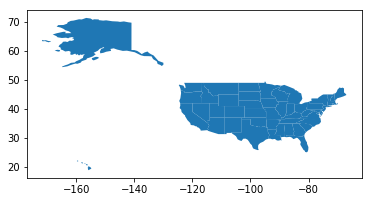

In [11]:
# but let´s plot the whole geometry
# not working right? so to plot it we need to assing at least one ax (we will talk more about this in future videos)
ax = gdf.plot()

# here we go, we have our map
# now we need to increase the size to see it in a better way

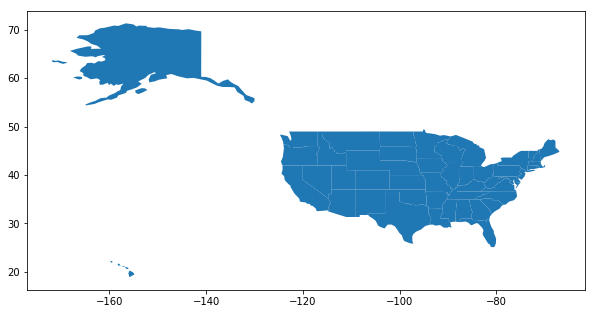

In [12]:
gdf.plot(figsize=(10, 10))
# and, of course, we need to add a projection here, we are geo folks, we need good projection!!!!!!

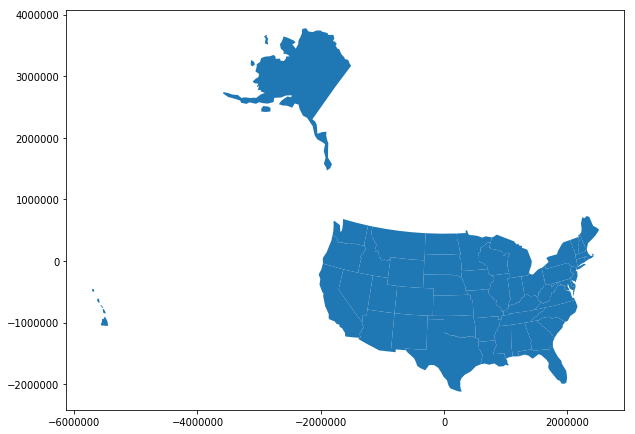

In [13]:
gdf = gdf.to_crs(epsg=2163)
gdf.plot(figsize=(10, 10))

# now it looks much better 

In [14]:
# let´s add some color, it would be great to have a numerical attribute to create our choroplete map
# but if you remember, there is no such a column, but we can create it using the geometry, so let´s calculate the area
gdf.head(5)

,name,country,ISO3166-1-Alpha-3,state_code,id,geometry
0,Minnesota,United States of America,USA,MN,USA-3514,"POLYGON ((771214.9506389854 384973.0993258929,..."
1,Montana,United States of America,USA,MT,USA-3515,"POLYGON ((-883371.462586803 12299.90338338311,..."
2,North Dakota,United States of America,USA,ND,USA-3516,"POLYGON ((260768.5370219305 155763.1776856319,..."
3,Hawaii,United States of America,USA,HI,USA-3517,(POLYGON ((-5568212.874012694 -1020057.3226881...
4,Idaho,United States of America,USA,ID,USA-3518,POLYGON ((-873158.7315897648 2673.916408162856...


In [15]:
gdf['area'] = gdf['geometry'].area

In [16]:
gdf.head(5)
# we have the area in m2, to transform it to km2

,name,country,ISO3166-1-Alpha-3,state_code,id,geometry,area
0,Minnesota,United States of America,USA,MN,USA-3514,"POLYGON ((771214.9506389854 384973.0993258929,...",2.257249e+11
1,Montana,United States of America,USA,MT,USA-3515,"POLYGON ((-883371.462586803 12299.90338338311,...",3.760453e+11
2,North Dakota,United States of America,USA,ND,USA-3516,"POLYGON ((260768.5370219305 155763.1776856319,...",1.825232e+11
3,Hawaii,United States of America,USA,HI,USA-3517,(POLYGON ((-5568212.874012694 -1020057.3226881...,1.697257e+10
4,Idaho,United States of America,USA,ID,USA-3518,POLYGON ((-873158.7315897648 2673.916408162856...,2.151887e+11


In [17]:
gdf['area'] = gdf['geometry'].area / 10**6
#realize here that we are overwriting the area column instead of creating a new one

In [18]:
gdf.head(5)

,name,country,ISO3166-1-Alpha-3,state_code,id,geometry,area
0,Minnesota,United States of America,USA,MN,USA-3514,"POLYGON ((771214.9506389854 384973.0993258929,...",225724.894588
1,Montana,United States of America,USA,MT,USA-3515,"POLYGON ((-883371.462586803 12299.90338338311,...",376045.290194
2,North Dakota,United States of America,USA,ND,USA-3516,"POLYGON ((260768.5370219305 155763.1776856319,...",182523.214240
3,Hawaii,United States of America,USA,HI,USA-3517,(POLYGON ((-5568212.874012694 -1020057.3226881...,16972.567361
4,Idaho,United States of America,USA,ID,USA-3518,POLYGON ((-873158.7315897648 2673.916408162856...,215188.724301


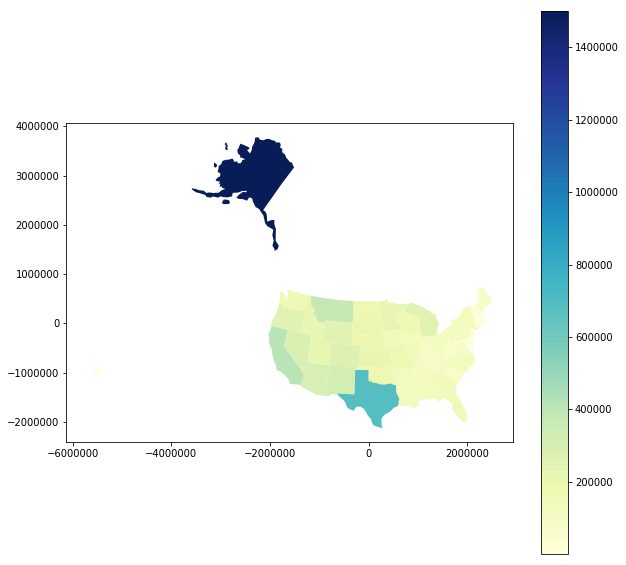

In [19]:
# let´s finish with the choroplete map, see that we use the column area to plot it and the 'YlGnBu' as color (+ legent true 
# to show the legend)
gdf.plot(figsize=(10, 10), column='area', cmap ='YlGnBu', legend = True)

In [ ]:
# Unfortunately, geopandas package does not contains basemaps, but the good thing of python is that we can mix packages
#and for example, use the folium package to provide the base map
# but that will be another tutorial
# thank you for wa